# Introducing Multi - class Logistic Regression
We have already learned about logistic regression in [this notebook](https://www.kaggle.com/manishkc06/binary-class-logistic-regression-beginner-s-intro) and build logistic regression model on insurance data in [this notebook](https://www.google.com/url?q=https://github.com/dphi-official/ML_Models/blob/master/Logistic_Regression/logistic_regression.ipynb&sa=D&ust=1592317719569000&usg=AFQjCNGLPKpHwzSZWpRTauOb8vUv7cEmVA). In the earlier notebook we had build binary logistic regression as the target variable (i.e. bought_insurance) in insurance data has two classes 1 (bought insurance) and 0 (didn't buy insurance). In this notebook we will talk about multi - class logistic regression.

**Multi - class Logistic Regression:** Here the target variable has more than two possible classes/categories. For example, salary of an employee can be categorized as **'low', 'medium' and 'high'**. There are two types of multi - class logistic regression:

1. **Multinomial Logistic Regression:**
The target variable has three or more classes/categories which are not in any particular order. So, there are three or more nominal categories.
Examples: Fruits (apple, mango, orange and banana), profession (e.g., with five groups: surgeon, doctor, nurse, dentist, therapist)

2. **Ordinal Logistic Regression:**
The target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories.
For example, the student performance can be categorized as poor, average, good and excellent, the salary of an employee can be categorized as **'low', 'medium' and 'high'**

## Agenda
*  About Dataset
*  Loading Libraries and Data
*  Understanding the Data
*  Separating Input and Output Variables
*  Splitting Data into Train and Test Sets
*  Build Model
*  Prediction
*  Check Model Performace


## About Dataset
I hope all of you guys remembered the wine dataset on which we have done exploratory data analysis. Here we will take only red wine data. Given different physiochemical tests, we want to predict the quality of wine in range 1 to 10.



## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are most commonly used libraries. Numpy is required for calculations like means, medians, square roots, etc. Pandas is used for data processin and data frames. We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

In [1]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Data
Pandas module is used for reading files. We have our data in '.csv' format. We will use 'read_csv()' function for loading the data.

In [3]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
from google.colab import drive
drive.mount('/content/drive')
red_wine_data = pd.read_csv("/content/drive/My Drive/winequality-red.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Understanding Data
Let's see how our data looks.

In [4]:
# Red Wine
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Different attributes
**Input variables (based on physicochemical tests):**
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9.  pH
10.  sulphates
11.  alcohol
**Output variable (based on sensory data):**
12. quality (score between 0 and 10)

In [6]:
# Basic statistical details about data
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's see target variable 'quality'.

<Axes: xlabel='quality'>

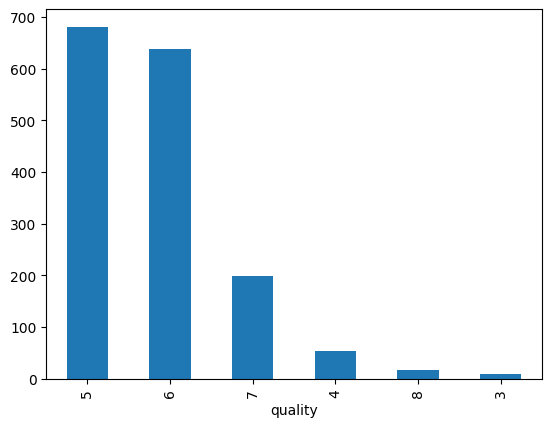

In [7]:
red_wine_data.quality.value_counts().plot(kind = 'bar')

We can observe here more wines are of average quality than poor quality and good quality. This is what we had observed in our EDA notebook of wine data.

We have already done the EDA part of this dataset in our earlier notebook. So we will not dive into EDA more here. Let's separate the independent and dependent variables.

### Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we can see that whether a person will buy insurance or not is dependent on the age of that person

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [8]:
# Input/independent variables
X = red_wine_data.drop('quality', axis = 1)   # her we are droping the quality feature as this is the target and 'X' is input features, the changes are not
                                              # made inplace as we have not used 'inplace = True'

y = red_wine_data.quality             # Output/Dependent variable

In [9]:
# Let's check the shapes of X and y
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (1599, 11) Dimension:  2
Shape:  (1599,) Dimension:  1


We had discussed in the earlier notebook that input variable must be a 2D array and target of 1D array.

### Splitting the data into Train and Test Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [10]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [16]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

## Building Model
Now we are finally ready, and we can train the model.

First, we need to import our model - Logistic Regression (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [17]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [18]:
log_model = LogisticRegression()

### !!!Warning
Different columns in this dataset are in different scales. One may get 'ConvergenceWarning' here while fitting the model. Please ignore this for here. If you want to get rid of this error then scale your data.

In [19]:
# Fit the model
log_model.fit(X_train, y_train)

LogisticRegression()

The training happens in the third line (the "fit" function).

**Point to be noted:**
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

If you clearly observe the above output that you got after fitting the model, there is an argument called 'multi_class' which is 'auto' by default. If you go back and see the insurance data, the argument 'multi_class' was still 'auto'. Here 'auto' does automatic selection of binary and multinomial. If the data is binary classification 'auto' does binary classification, and if the data is multi classification, 'auto' does multi classification.

Note: You can also change 'auto' to 'ovr'. Here 'ovr' does only binary classificaion.

Further details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Prediction
Now logistic regression model (i.e. log_model) is trained using X_train and y_trian data. Let's predict the target value (i.e. the quality of wine) for the X_test data. We use "predict()" method for prediction.

In [31]:
predictions = log_model.predict(X_test)
y_proba=log_model.predict_proba(X_test)

In [21]:
y_test.values

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [22]:
predictions

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6,

### Model Performance
We can also check how accurate our model is performing using the 'accuracy_score' class from 'sklearn.metrics'.

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, predictions)

0.5479166666666667

In [30]:
from sklearn.metrics import classification_report,accuracy_score
from imblearn.metrics import specificity_score
model_report=classification_report(y_test,predictions,digits=3)
print(specificity_score(y_test,predictions,average='weighted'))
print(accuracy_score(y_test,predictions))
print(cm.diagonal()/cm.sum(axis=1))
print(model_report)

0.6851546751724179
0.5479166666666667
[0.         0.         0.71282051 0.615      0.01639344 0.        ]
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000        17
           5      0.604     0.713     0.654       195
           6      0.498     0.615     0.550       200
           7      0.333     0.016     0.031        61
           8      0.000     0.000     0.000         6

    accuracy                          0.548       480
   macro avg      0.239     0.224     0.206       480
weighted avg      0.495     0.548     0.499       480



0.33377478012721695


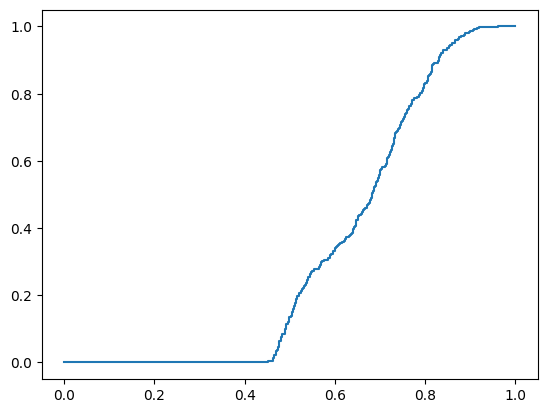

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_true_binarized=label_binarize(predictions,classes=[1,2,3,4,5,6])
n_classes=y_true_binarized.shape[1]
fpr=dict()
tpr=dict()
roc_auc=dict()

roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_true_binarized[:,i],np.array(y_proba)[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

fpr["micro"],tpr["micro"],_=roc_curve(y_true_binarized.ravel(),np.array(y_proba).ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

print(roc_auc["micro"])
plt.plot(fpr["micro"],tpr["micro"])
df=pd.DataFrame({'fpr':fpr["micro"],'tpr':tpr["micro"]})
plt.show()